### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [120]:
data = pd.read_csv('data/coupons.csv')

In [121]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [122]:
print(data.isnull().sum())
print(data.shape)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
(12684, 26)


3. Decide what to do about your missing data -- drop, replace, other...

--> renaming 'car' missing values to 'generic' as most rows are missing, other option is to remove column.
--> other missing rows are minimal and can not be accurately predicated so removing those rows. 

In [123]:
#print(data['car'].unique())
data['car'].fillna('generic', inplace= True)
data.dropna(axis=0, inplace=True)  # dropping all other NANs as they cant be predicted accurately.
#print(data.isnull().sum())
#print (data.shape)  


Renaming age values 50plus to 51 and below 21 to 20 and then converting it to integer.

Correnting typo in Passenger column name by renaming column.

In [124]:
data['age'] = data.age.replace({'50plus' : 51, 'below21': 20}).astype(int)
data.rename(columns = {'passanger' : 'passenger'}, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  int64 
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  car                   12079 non-null  object
 15  Bar                   12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [125]:
acceptance_rate = (data.query('Y == 1').value_counts('Y')*100/data.shape[0]).round(2).to_list()

print(f" Coupon acceptance rate : {acceptance_rate[0]} %")
#print(f'acceptance_rate)

 Coupon acceptance rate : 56.93 %


In [126]:
data.describe()

,temperature,age,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,32.540359,0.408478,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,10.477995,0.491573,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,20.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,31.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,41.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,51.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


5. Use a bar plot to visualize the `coupon` column.

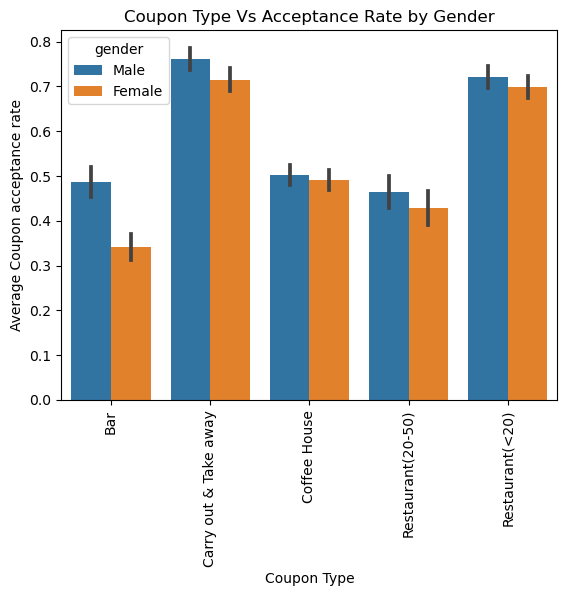

In [127]:

sns.barplot(data, x='coupon', y= 'Y', hue='gender', order = sorted(data['coupon'].unique()))

plt.xlabel('Coupon Type')
plt.xticks(rotation=90)
plt.ylabel('Average Coupon acceptance rate')
plt.title('Coupon Type Vs Acceptance Rate by Gender')
plt.savefig('./images/coupon_barplot_by_gender.png', edgecolor='auto', dpi='figure', 
            format='png', bbox_inches='tight')

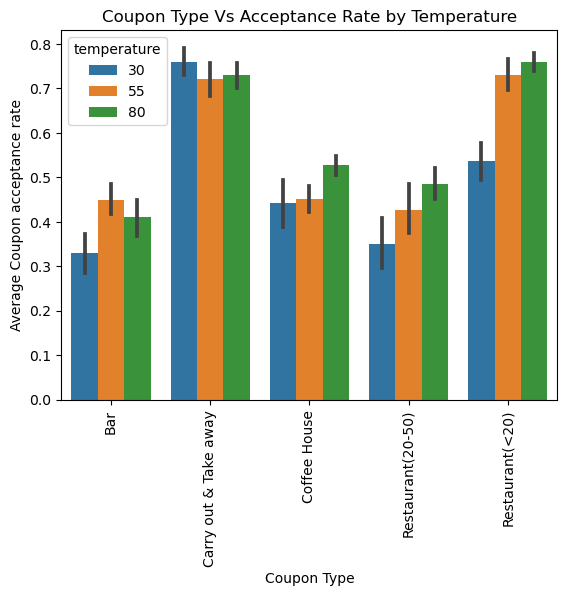

In [128]:
sns.barplot(data, x='coupon', y= 'Y', hue='temperature', order = sorted(data['coupon'].unique()))

plt.xlabel('Coupon Type')
plt.xticks(rotation=90)
plt.ylabel('Average Coupon acceptance rate')
plt.title('Coupon Type Vs Acceptance Rate by Temperature')
plt.savefig('./images/coupon_barplot_by_temperature.png', edgecolor='auto', dpi='figure', 
            format='png', bbox_inches='tight')

6. Use a histogram to visualize the temperature column.

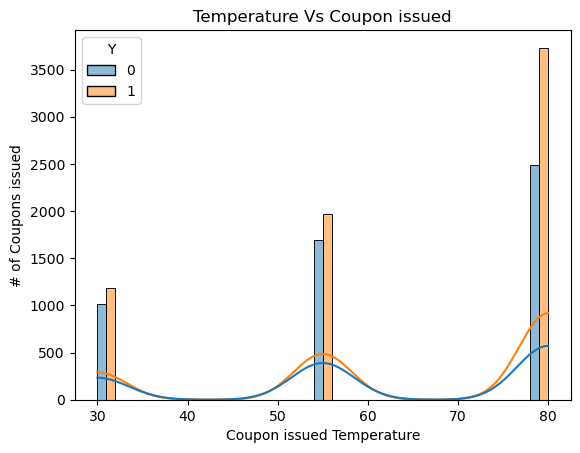

In [129]:
sns.histplot(data, x='temperature', hue='Y', kde=True, multiple='dodge', bins=25, alpha = 0.5 )
plt.xlabel('Coupon issued Temperature')
plt.ylabel('# of Coupons issued')
plt.title('Temperature Vs Coupon issued')
plt.savefig('./images/Temperature_vs_coupon.png', format='png', dpi= 'figure',
           bbox_inches = 'tight')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [130]:
data_Bar=data.query('coupon == "Bar"')
data_Bar.head(2)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


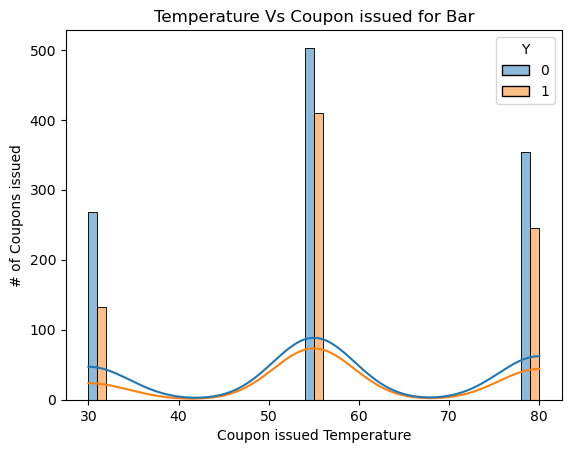

In [131]:
sns.histplot(data_Bar, x='temperature', hue='Y', kde=True, multiple='dodge', bins=25, alpha = 0.5 )
plt.xlabel('Coupon issued Temperature')
plt.ylabel('# of Coupons issued')
plt.title('Temperature Vs Coupon issued for Bar')
plt.savefig('./images/Temperature_vs_coupon_for_Bar.png', format='png', dpi= 'figure',
           bbox_inches = 'tight')

2. What proportion of bar coupons were accepted?


In [132]:
#Bar_Coupon_acc=data_Bar.value_counts('Y').reset_index().query('Y == 1')[0]*100/data_Bar.shape[0]
Bar_Coupon_acc = (data_Bar.query('Y == 1').value_counts('Y')*100/data_Bar.shape[0]).round(2).to_list()
print(f" Bar Coupon Acceptance Rate : {Bar_Coupon_acc[0]} %")



 Bar Coupon Acceptance Rate : 41.19 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [133]:
#print (data_Bar['Bar'].unique())
data_Bar_gt4 = data_Bar.query('Bar == "gt8" or Bar == "4~8"')
data_Bar_lt4 = data_Bar.query('Bar != "gt8" and Bar != "4~8"')
Bar_acceptance_rate_gt4 = (data_Bar_gt4.query('Y==1').value_counts('Y')*100/data_Bar_gt4.shape[0]).round(2).to_list()
Bar_acceptance_rage_lt4= (data_Bar_lt4.query('Y==1').value_counts('Y')*100/data_Bar_lt4.shape[0]).round(2).to_list()
print(f" Bar Acceptance Rate for those who went to bar 3 or fewer times a month : {Bar_acceptance_rage_lt4[0]} %")
print (F" Bar Acceptance Rate for those who went to bar more than 3 times a month :  {Bar_acceptance_rate_gt4[0]} %")


 Bar Acceptance Rate for those who went to bar 3 or fewer times a month : 37.27 %
 Bar Acceptance Rate for those who went to bar more than 3 times a month :  76.17 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [134]:
less_1month = ['never', 'less1']
data_Bar_mt1_gt25 = data_Bar.query('(Bar not in @less_1month) and age > 25')
print (data_Bar_mt1_gt25['Bar'].unique(), data_Bar_mt1_gt25['age'].unique()
       , data_Bar_mt1_gt25.shape[0])
data_Bar_remaining = data_Bar.query('Bar in @less_1month  or age < 25')
print (data_Bar_remaining['Bar'].unique(), data_Bar_remaining['age'].unique(),
      data_Bar_remaining.shape[0])
Bar_acceptance_rate_mt1_gt25 = (data_Bar_mt1_gt25.query ('Y ==1').value_counts('Y')*100/data_Bar_mt1_gt25.shape[0]).round(2).to_list()
print (F" Bar Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25 :  {Bar_acceptance_rate_mt1_gt25[0]} %")
Bar_acceptance_rate_remaining = (data_Bar_remaining.query ('Y ==1').value_counts('Y')*100/data_Bar_remaining.shape[0]).round(2).to_list()
print (F" Bar Acceptance Rate for drivers who are not part of going to a bar more than once a month and above age of 25  {Bar_acceptance_rate_remaining[0]} %")




['1~3' 'gt8' '4~8'] [26 31 51 41 36 46] 403
['never' 'less1' '1~3' '4~8' 'gt8'] [21 46 26 31 41 51 36 20] 1510
 Bar Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25 :  68.98 %
 Bar Acceptance Rate for drivers who are not part of going to a bar more than once a month and above age of 25  33.77 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [135]:
data_Bar_mt1_nokids_nofarm = data_Bar.query('Bar not in @less_1month and passenger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')

data_Bar_mt1_nokids_nofarm_remaining = data_Bar[~data_Bar.index.isin(data_Bar_mt1_nokids_nofarm.index)]


Bar_acceptance_rate_mt1_nokids_nofarm = (data_Bar_mt1_nokids_nofarm.query ('Y ==1').value_counts('Y')*100/data_Bar_mt1_nokids_nofarm.shape[0]).round(2).to_list()
print (F" Bar Acceptance Rate for more than 1 visit/month, no passenger kids and no framing, fishing and Forestry occupation is  {Bar_acceptance_rate_mt1_nokids_nofarm[0]} %")
Bar_acceptance_ratemt1_nokids_nofarm_remaining = (data_Bar_mt1_nokids_nofarm_remaining.query ('Y ==1').value_counts('Y')*100/data_Bar_mt1_nokids_nofarm_remaining.shape[0]).round(2).to_list()
print (F" Bar Acceptance Rate for remaining  {Bar_acceptance_ratemt1_nokids_nofarm_remaining[0]} %")


 Bar Acceptance Rate for more than 1 visit/month, no passenger kids and no framing, fishing and Forestry occupation is  70.94 %
 Bar Acceptance Rate for remaining  29.79 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [136]:
data['maritalStatus'].unique()
print(data['RestaurantLessThan20'].unique())
income_lt50K = ['$12500 - $24999' , '$37500 - $49999', '$25000 - $37499', 'Less than $12500']
Res_lt20_mt4t = ['4~8','gt8']

data_Bar_notwidowed = data_Bar.query('Bar not in @less_1month and passenger != "Kid(s)" and maritalStatus != "Widowed"')
data_Bar_agelt30 = data_Bar.query ('Bar not in @less_1month and age < 30')
data_Bar_cheap_res = data_Bar.query('RestaurantLessThan20 in @Res_lt20_mt4t and income in @income_lt50K')

Bar_acceptance_rate_notwidowed = (data_Bar_notwidowed.query ('Y ==1').value_counts('Y')*100/data_Bar_notwidowed.shape[0]).round(2).to_list()
print (F" Bar Acceptance Rate for more than 1 visit/month, no passenger kids not widowed is  {Bar_acceptance_rate_mt1_nokids_nofarm[0]} %")

Bar_acceptance_rate_agelt30 = (data_Bar_agelt30.query ('Y ==1').value_counts('Y')*100/data_Bar_agelt30.shape[0]).round(2).to_list()
print (F" Bar Acceptance Rate for more than 1 visit/month, and age is less than 30 is  {Bar_acceptance_rate_agelt30[0]} %")

Bar_acceptance_rate_cheap_res= (data_Bar_cheap_res.query ('Y ==1').value_counts('Y')*100/data_Bar_cheap_res.shape[0]).round(2).to_list()
print (F" Bar Acceptance Rate for person who goes to cheap restaurants more than 4 times a month and income is less than 50K.is  {Bar_acceptance_rate_cheap_res[0]} %")


['4~8' '1~3' 'less1' 'gt8' 'never']
 Bar Acceptance Rate for more than 1 visit/month, no passenger kids not widowed is  70.94 %
 Bar Acceptance Rate for more than 1 visit/month, and age is less than 30 is  71.95 %
 Bar Acceptance Rate for person who goes to cheap restaurants more than 4 times a month and income is less than 50K.is  45.65 %


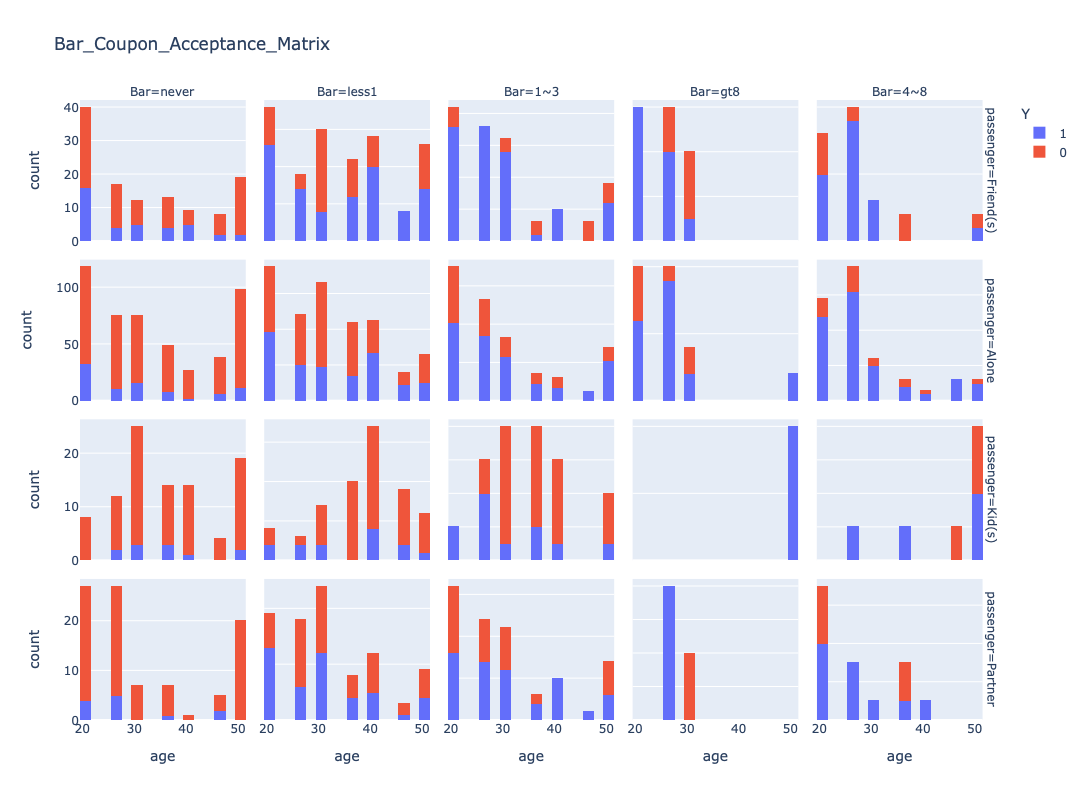

In [137]:
fig = px.histogram(data_Bar, x= 'age', color ='Y', facet_col='Bar', facet_row = 'passenger', width = 800, height=800, title="Bar_Coupon_Acceptance_Matrix" )
fig.update_yaxes(matches=None) 
fig.show()
fig.write_image('./images/Bar_Coupon_Acceptance_matrix.png')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Bar Coupon Acceptance Findings

    1. Male are more inclined to accept coupons. Male accepted around 10% more coupon's than female. 
    2. People visiting frequently, more than 3 times a month, are around 80% likely to accept coupon. 
    3. People above 25 years of age are more likely to accept coupon if they are vising atleast once a month. 
    4. Having kid as a passenger along with you significantly reduced chances of coupon acceptance. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Exploring Coffee House
How Weather, age demographics, coupon expiration, gender and other factors play part in accpetance rate. 

Creating Coffe House datafrmae.

In [138]:
df_Coffee = data.query('coupon == "Coffee House"')
df_Coffee.head(2)
#df_Coffee.shape


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [139]:
CoffeeHouse_Coupon_acc = (df_Coffee.query('Y == 1').value_counts('Y')*100/df_Coffee.shape[0]).round(2).to_list()
print(f" CoffeeHouse Coupon Acceptance Rate : {CoffeeHouse_Coupon_acc[0]} %")

 CoffeeHouse Coupon Acceptance Rate : 49.63 %


1. Finding Coupon acceptance proportion when driver visits more than once ad month, age is below 21 (as Bar is not the option :)) and Coupon is expiring in two hours and compare that aginst more than one visit remaining age group with coupon expring in two hours.

 Coffee Coupon Acceptance Rate for one or more visit/month, age below 21 is  61.54 %
 Coffee Coupon Acceptance Rate for one or more visit/month, age above 21 is  51.27 %


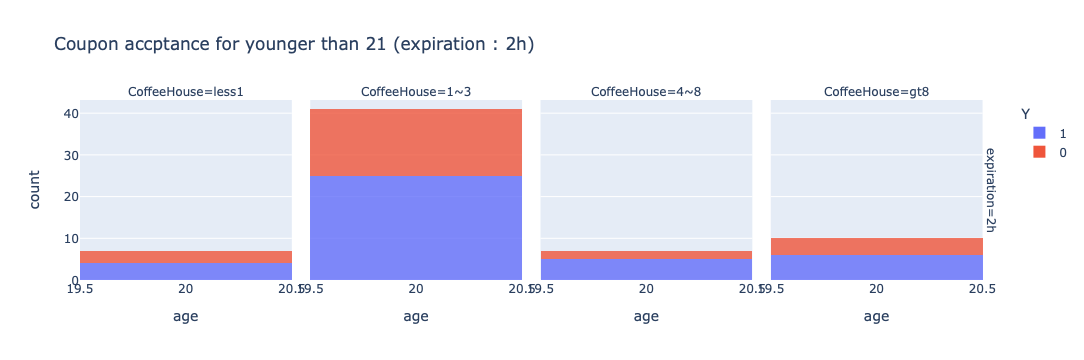

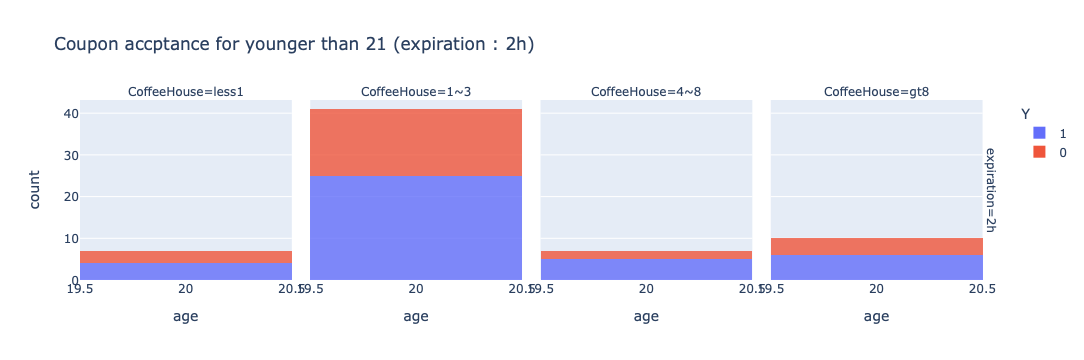

In [140]:
df_Coffee_below21 =  df_Coffee.query('age < 21 and expiration =="2h" and CoffeeHouse  not in ["never"]')
df_Coffee_above21 = df_Coffee.query('age >= 21 and expiration =="2h" and CoffeeHouse  not in ["never"]')
#print(df_Coffee_above21['age'].unique())
Coffee_acc_rate_lt21 = (df_Coffee_below21.query ('Y ==1').value_counts('Y')*100/df_Coffee_below21.shape[0]).round(2).to_list()
print (F" Coffee Coupon Acceptance Rate for one or more visit/month, age below 21 is  {Coffee_acc_rate_lt21[0]} %")
Coffee_acc_rate_gt21 = (df_Coffee_above21.query ('Y ==1').value_counts('Y')*100/df_Coffee_above21.shape[0]).round(2).to_list()
print (F" Coffee Coupon Acceptance Rate for one or more visit/month, age above 21 is  {Coffee_acc_rate_gt21[0]} %")

fig_below21 =px.histogram(df_Coffee_below21, x='age', color='Y', facet_col='CoffeeHouse', facet_row='expiration', 
                   category_orders={"CoffeeHouse" : ["less1", "1~3", "4~8", "gt8"]}, opacity=0.8, 
                  title = "Coupon accptance for younger than 21 (expiration : 2h)")
fig_above21 = px.histogram(df_Coffee_above21, x='age', color='Y', facet_col='CoffeeHouse', facet_row='expiration', 
                    category_orders={"CoffeeHouse" : ["less1", "1~3", "4~8", "gt8"]}, opacity=0.8,
                   title = "Coupon acceptance for 21 and older (expireation: 2h)")
fig_below21.show()
fig_below21.show()
fig_below21.write_image('./images/CoffeeHouse_below21.png')
fig_above21.write_image('./images/CoffeeHouse_above21.png')





2. compare coupon acceptance proportion When temperature is 30C and Weather is Sunny Vs Weather is snowy

In [141]:
df_Coffee_snow = df_Coffee.query('weather == "Snowy" and temperature == 30')
df_Coffee_Sunny = df_Coffee.query('weather == "Sunny" and temperature == 30')


Coffee_acc_rate_sunny30C = (df_Coffee_Sunny.query ('Y ==1').value_counts('Y')*100/df_Coffee_Sunny.shape[0]).round(2).to_list()
print (F" Coffee Coupon Acceptance Rate for when weather is Sunny and temperature is 30C : {Coffee_acc_rate_sunny30C[0]} % ")
Coffee_acc_rate_snow30C = (df_Coffee_snow.query ('Y ==1').value_counts('Y')*100/df_Coffee_snow.shape[0]).round(2).to_list()
print (F" Coffee Coupon Acceptance Rate for when weather is Snowy and temperature is 30C : {Coffee_acc_rate_snow30C[0]} %")


 Coffee Coupon Acceptance Rate for when weather is Sunny and temperature is 30C : 71.43 % 
 Coffee Coupon Acceptance Rate for when weather is Snowy and temperature is 30C : 42.81 %


3. If person has visited Coffee house more than 1 time in a month, location is within 5 mins, then compare same direction vs opposite direction proportion for 5 minutes travelling distance. Consider visits/month is greater than 1. 

In [143]:
df_Coffee_samedir = df_Coffee.query('CoffeeHouse not in ["never", "less1"] and toCoupon_GEQ5min == 1 and direction_same == 1')
df_Coffee_oppdir = df_Coffee.query('CoffeeHouse not in ["never", "less1"] and toCoupon_GEQ5min == 1 and direction_opp == 1')
print(df_Coffee_oppdir['direction_opp'].unique())

Coffee_acc_rate_samedir = (df_Coffee_samedir.query ('Y ==1').value_counts('Y')*100/df_Coffee_samedir.shape[0]).round(2).to_list()
print (F" Coffee Coupon Acceptance Rate for same direction in 5 mins for frequent visitor :  {Coffee_acc_rate_samedir[0]} %")
Coffee_acc_rate_oppdir = (df_Coffee_oppdir.query ('Y ==1').value_counts('Y')*100/df_Coffee_oppdir.shape[0]).round(2).to_list()
print (F" Coffee Coupon Acceptance Rate for opposite direction in 5 mins for frequent visitor  {Coffee_acc_rate_oppdir[0]} % ")



[1]
 Coffee Coupon Acceptance Rate for same direction in 5 mins for frequent visitor :  72.94 %
 Coffee Coupon Acceptance Rate for opposite direction in 5 mins for frequent visitor  64.33 % 


### Hypothesis 
1. Younger than 21 drivers are inclined to accept more Coupons. 
2. Drivers are more inclined to accept Coupon in Sunny weather compared to Snowy wether. 
3. Drivers are more inclined to accept Coupon if Coffeehouse is in the same direction as they are traveling. 

#### Next Steps :
Analyze

    1. impact of Destination
    2. impact of income
    3. impact of occupation
    4. impact of passenger (if traveling with someone else. )
    